# CHAPTER 9. 특성 추출을 사용한 차원 축소

목적 : 내제된 정보는 많이 유지하면서 특성 집합 P를 새로운 P' 집합으로 변환하는 것

## 9.1 주성분 사용해 특성 줄이기

### PCA(주성분 분석)

* 선형 차원 축소 기법으로 대부분의 분산을 유지하는 특성 행렬의 주성분에 샘플을 투영한다   
* target vector의 정보를 사용하지 않고 feature matrix만 이용하는 비지도 학습 기법이다
* 가장 분산이 많은 feature을 첫번째 주성분, 그 다음을 두번째 주성분이라고 한다. 이에 공간의 모든 샘플을 1차원 주성분에 투영해 희생시킨다?

#### n_componentss 매개변수


1. 매개변수값이 1보다 크면,   
n_components 개수만큼의 특성이 반환

2. 매개변수값을 0과 1 사이로 지정하면,   
    - pca는 해당 비율의 분산을 유지할 수 있는 최소한의 특성 개수를 반환
    - 주로 0.95와 0.99가 사용됨. 원본 특성의 95%와 99%의 분산을 유지한다는 의미
    

#### whiten = True   
로 지정하면 각 주성분의 값을 평균이 0이고 분산이 1이 되도록 반환

#### solver="randomized"   
는 아주 짧은 시간 안에 첫번째 주성분을 찾아주는 확률적 알고리즘을 사용

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

digits = datasets.load_digits()
features = StandardScaler().fit_transform(digits.data) # 특성행렬을 표준화 처리한다
pca = PCA(n_components=2, whiten=True) #99%의 분산을 유지하도록 PCA객체를 만듬
features_pca=pca.fit_transform(features) #pca를 수행

print("원본 특성 개수: ", features.shape[1])
print("줄어든 특성 개수: ", features_pca.shape[1])

원본 특성 개수:  64
줄어든 특성 개수:  2


PCA가 10개의 차원을 감소하면서 특성 행렬의 정보를 99% 유지했다는 것을 보임

In [15]:
features.shape

(1797, 64)

In [2]:
features_pca.shape

(1797, 2)

#### 화이트닝   

* 주성분에 투영된 특성의 스케일을 맞추는 역할   
(PCA는 평균을 0으로 맞추기 때문에 화이트닝 대신 나중에 투영된 특성을 표준화해도 됨)

* **scatter** method: 산포그래프 작성 함수
    + 형식: scatter(x,y,s=None, c=None)
    + x,y: x축과 y축을 리스트나 넘파이 배열같은 iterable한 자료형을 입력받는다
    + s: 마커의 크기를 설정, 스칼라로 입력할 경우 마커크기 고정, iterable한 자료형일 경우 각각 다른 크기 설정
    + c: 마커의 색상 섲ㄹ정

In [3]:
import matplotlib.pyplot as plt

plt.scatter(features_pca[:, 0], features_pca[:, 1]) #x축 행, y축 열
plt.show()

<Figure size 640x480 with 1 Axes>

* 결과적으로 두 특성의 스케일이 비슷하다.   
* PCA클래스의 whiten 매개변수의 기본값은 False다.   
* 화이트닝을 적용하지 않으면 평균은 0이지만 스케일은 맞춰지지 않는다. 

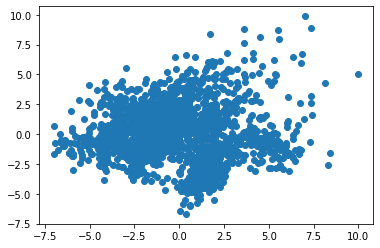

In [18]:
pca_nowhiten = PCA(n_components=0.99)
features_nowhiten=pca_nowhiten.fit_transform(features) #MinMax scaling
plt.scatter(features_nowhiten[:,0], features_nowhiten[:,1])
plt.show()

PCA로 찾은 주성분은 components_속성에 저장돼있다.   
해결에서 찾은 주성분은 행을 따라 54개 놓여 있고, 각 주성분은 원본 특성 공간에서 어떤 방향을 나타내므로 이 벡터의 크기는 64다   

In [19]:
pca_nowhiten.components_.shape

(54, 64)

특성 행렬을 주성분에 투영하기 위해선 components_배열을 전치해 점곱하면 된다.

In [20]:
import numpy as np

np.allclose(features_nowhiten, np.dot(features, pca_nowhiten.components_.T))

True

적절한 분산 비율 선택을 위해 전체 주성분의 설명된 분산에서 유지되는 분산의 양이 크게 늘어나지 않는 지점을 찾을 수 있다.   
n_components 매개변수를 지정 하지 않으면 특성 개수만큼 주성분이 만들어진다.   
주성분에 의해 설명된 분산은 explaines_variance_ratio_속성에 저장돼있다.   

### cumsum 함수   
를 통해 분산을 누적하여 그래프를 생성

#### plt.plot : Y 대 x를 선 및/또는 마커로 표시   

#### cumsum() : 주어진 축을 따라 요소의 누적 합계를 반환
* np.cumsum(a, axis=None, dtype=None, out=None)   
a: input array

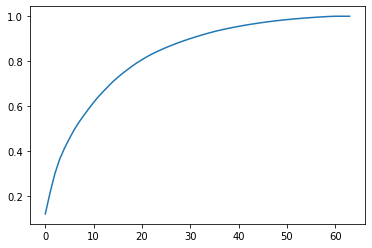

In [21]:
pca= PCA(whiten=True).fit(features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

30개의 주성분으로도 80%이상의 분산을 유지, 그 이후로 증가 추세가 꺽임   


#### 전체 샘플 개수를 자유도로 사용하는 경우   
(사이킷런 0.19버전에서 샘플의 자유도를 계산할때 샘플 개수에서 1을 빼지 않는 버그가 수정됨)
원본 대이터를 그대로 PCA에 주입하는 것이 좋음


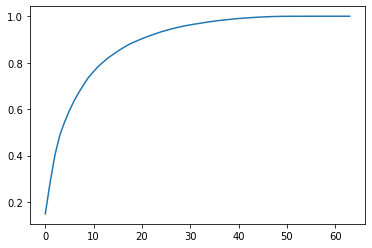

In [22]:
# 표준화되지 않은 원본 데이터를 사용
pca.fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

*** 

## 9.2 선형적으로 구분되지 않은 데이터의 차원 축소하기

데이터가 선형적으로 구분되지 않으면(즉, 구부러진 결정 경계를 사용해서만 클래스를 나눌 수 있다면) 선형변환이 잘 맞지않아 PCA가 잘 동작하지 못한다.

### 커널 트릭을 사용하는 주성분 분석의 확장을 사용해 비선형 차원 축소 시행

In [40]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

features, _ = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)
# 선형적으로 구분되지 않는 데이터 생성
# 2개의 클래스를 갖는 타깃 벡터와 2개의특성을 갖는 모의 데이터셋 생성

# 방사 기저 함수(radius basis function, RBF)를 사용하여 커널 PCA를 적용합니다.
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features)

print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_kpca.shape[1])

원본 특성 개수: 2
줄어든 특성 개수: 1


In [6]:
print(features, _)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]] [[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


### make_circles   
는 선형적으로 구분되지 않는 데이터를 만듬

### 선형 PCA VS 커널 PCA

* 선형 PCA : 데이터의 차원을 축소하면 두 클래스가 첫번째 주성분에 선형적으로 투영되기 때문에 서로 섞임

* 커널 PCA : 차원을 축소하면서 두 클래스가 선형적으로도 구분되는 변환
    - 선형적으로 구분되지 않는 데이터를 선형적으로 구분되는 고차원으로 투영시켜줌 -> 커널트릭

### KernelPCA

* 위 커널 함수들은 kernel 매개변수를 사용해 지정한다
    - linear(선형 투영)으로 지정하면 표준 PCA와 동일한 결과를 만듬
    
* 커널 함수 : rdf(가우시안 방사 기저 함수 커널), poly(다항식 커널), sigmoid

* 설정해야하는 매개변수가 많다는 것이 단점
    - EX) 주성분의 개수를 선택해주는 n_components 옵션 사용불가능, 대신 주성분의 개수를 지정해야 함
    - 자체적으로 설정해야 할 hyper parameter를 동반한다.   
    ex) 방사기저함수는 gamma값을 설정해야함

### 커널트릭   

* 고차원 공간에서 주성분으로 투영된 결과를 반환한다.
* 실제 고차원 공간으로 변환하는 것은 아니기 때문에 주성분을 얻을 수 는 없다. 
* n_components속성이 정의되지 않는다.

In [24]:
kpca.components_

AttributeError: 'KernelPCA' object has no attribute 'components_'

* kernel 매개변수의 기본값은 linear이다

* gamma 매개변수는 rdf, poly, sigmoid 커널에서 사용하는 계수,   
기본값은 특성 개수의 역수다.

* degree 매개변수는 poly커널에서 사용하는 거듭제곱 수이고 기본값은 3

* coef0매개변수는 poly와 sigmoid 커널에서 사용되는 상수항으로 기본값은 1이다.

*** 

## 9.3 클래스 분리를 최대화함으로써 특성을 줄이기

### 선형판별 분석(LDA)을 사용해 클래스 최대한 분리

In [25]:
#라이브러리를 임포트합니다.
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 붓꽃 데이터셋을 로드합니다.
iris = datasets.load_iris()
features = iris.data
target = iris.target

# LDA 객체를 만들고 실행하여 특성을 변환합니다.
lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features, target).transform(features)

# 특성 개수를 출력합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_lda.shape[1])

원본 특성 개수: 4
줄어든 특성 개수: 1


### explained_variance_ratio_
사용해 각 성분이 설명하는 분산의 양을 크기순으로 확인할 수 있다

In [26]:
lda.explained_variance_ratio_

array([0.9912126])

### LDA

* 특성 공간을 저차원 공간으로 투영한다
* 타깃벡터를 사용한다
* 분산이 최대인 성분 축을 목적으로 가짐과 동시에,   
클래스 간의 차이를 최대화하는 추가적인 목적을 가짐.

* LinearDiscriminantAnalysis 클래스에 구현돼있음
* n_components 매개변수에 원하는 특성의 개수 지정
    - None으로 지정하면, LinearDiscriminantAnalysis을 실행할 수 있다. 
* 모든 성분 특성에 의해 설명된 분산의 비율을 반환하고, 설명된 분산의 임계값을 넘기 위해 필요한 성분 개수를 계산한다.(주로 0.95나 0.99)

In [27]:
# LDA를 만들고 실행합니다.
lda = LinearDiscriminantAnalysis(n_components=None)
features_lda = lda.fit(features, target)

# 설명된 분산의 비율이 담긴 배열을 저장합니다.
lda_var_ratios = lda.explained_variance_ratio_

# 함수를 만듭니다.
def select_n_components(var_ratio, goal_var: float) -> int:
    # 설명된 분산의 초기값을 지정합니다.
    total_variance = 0.0

    # 특성 개수의 초깃값을 지정합니다.
    n_components = 0

    # 각 특성의 설명된 분산을 순회합니다.
    for explained_variance in var_ratio:

        # 설명된 분산 값을 누적합니다.
        total_variance += explained_variance

        # 성분 개수를 카운트합니다.
        n_components += 1

        # 설명된 분산이 목표치에 도달하면 
        if total_variance >= goal_var:
            # 반복을 종료합니다.
            break

    # 성분 개수를 반환합니다.
    return n_components

# 함수를 실행합니다.
select_n_components(lda_var_ratios, 0.95)

1

***

## 9.4 행렬 분해를 사용해 특성 줄이기

### 비음수 행렬 분해(NMF)를 사용해 특성 행렬 차원 축소

In [44]:
# 라이브러리를 임포트합니다.
from sklearn.decomposition import NMF
from sklearn import datasets

# 데이터를 로드합니다.
digits = datasets.load_digits()

# 특성 행렬을 로드합니다.
features = digits.data

# NMF를 만들고 학습하고 적용합니다.
nmf = NMF(n_components=10, random_state=1)
features_nmf = nmf.fit_transform(features)

# 결과를 출력합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_nmf.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 10


### NMF

* 선형 차원 축소를 위한 비지도 학습 기법이다.
* 샘플과 특성 사이 잠재돼있는 관계를 표혀하는 행렬로 특성 행렬을 분해한다.   
(곱해서 거의 원본 행렬이 되는 여러개의 행렬로 나눈다.)
* 행렬 곱셈에서 곱하는 행렬은 경과 행렬보다 훨씬 적은 차원을 갖기 때문에 NMF가 차원을 축소할 수 있다.

* 특성 개수 r이 주어지면 V≈WH로 특성행렬 분해
    - V는 nxd크기의 특성행렬(n개의 샘플, d개의 특성)
    - W는 nxr크기의 행렬
    - H는 rxd의 행렬   
    r값을 조절해 필요한 차원 축소의 양을 정할 수 있다.

* 특성행렬이 음수를 포함해지 않음
* 특성의 설명된 분산을 제공하지 않음   
n_components의 최적값을 찾는 가장 좋은 방법은 최종 모델에서 가장 좋은 결과를 내는 것을 찾아 여러 값을 시도해 보는 것

#### H행렬   
* components_ 속성에 저장돼있다.
* W행렬이 변환된 데이터 features_nmf이다

In [45]:
nmf.components_.shape

(10, 64)

In [46]:
np.all(nmf.components_ >= 0)
# 모든 성분 값 양수

True

원본 데이터를 복원하기 위해   
변환된 행렬 W와 성분행렬 H을 점곱한다.   
(완벽하게 복원되지 않지만 두 행렬의 차이가 크지 않음을 알 수 있다.)

In [47]:
np.mean(features - np.dot(features_nmf, nmf.components_))

-0.20062043744127928

* NMF 클래스의 solver 매개변수의 기본값은 cd로 좌표 하강법을 사용한다. 

In [48]:
nmf_mu = NMF(n_components=10, solver='mu', random_state=1)
# mu : 곱셈 업데이트 알고리즘 옵션
features_nmf_mu = nmf_mu.fit_transform(features)

In [49]:
np.mean(features - np.dot(features_nmf_mu, nmf_mu.components_))

-0.12629945585681077

***

## 9.5 희소한 데이터의 특성을 줄이기

### TSVD를 사용해 희소행렬의 차원 축소

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np

# 데이터를 로드합니다.
digits = datasets.load_digits()

# 특성 행렬을 표준화 처리합니다.
features = StandardScaler().fit_transform(digits.data)

# 희소 행렬을 만듭니다.
features_sparse = csr_matrix(features)

# TSVD 객체를 만듭니다.
tsvd = TruncatedSVD(n_components=10)

# 희소 행렬에 TSVD를 적용합니다.
features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)

# 결과를 출력합니다.
print("원본 특성 개수:", features_sparse.shape[1])
print("줄어든 특성 개수:", features_sparse_tsvd.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 10


### TSVD 

In [35]:
# 처음 세 개의 성분이 설명하는 분산의 비율 합
tsvd.explained_variance_ratio_[0:3].sum()

0.30039385388865764

In [36]:
# 특성 개수보다 하나 작은 TSVD를 만들고 실행합니다.
tsvd = TruncatedSVD(n_components=features_sparse.shape[1]-1)
features_tsvd = tsvd.fit(features)

# 설명된 분산을 리스트에 저장합니다.
tsvd_var_ratios = tsvd.explained_variance_ratio_

# 함수를 만듭니다.
def select_n_components(var_ratio, goal_var):
    # 설명된 분산을 초기화합니다.
    total_variance = 0.0

    # 특성 개수를 초기화합니다.
    n_components = 0

    # 특성의 설명된 분산을 순환합니다.
    for explained_variance in var_ratio:

        # 설명된 분산을 누적합니다.
        total_variance += explained_variance

        # 성분 개수를 카운트합니다.
        n_components += 1

        # 설명된 분산의 목표에 도달하면
        if total_variance >= goal_var:
            # 반복을 마칩니다.
            break

    # 성분 개수를 반환합니다.
    return n_components

# 함수를 실행합니다.
select_n_components(tsvd_var_ratios, 0.95)

40

In [37]:
features = digits.data - np.mean(digits.data, axis=0)

pca = PCA(n_components=40, random_state=1)
features_pca = pca.fit_transform(features)

In [38]:
tsvd = TruncatedSVD(n_components=40, random_state=1)
features_tsvd = tsvd.fit_transform(features)

In [39]:
np.max(np.abs(features_pca - features_tsvd))

0.002010962081248735